# Kaggle competition link: https://www.kaggle.com/c/titanic/overview

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.


In [1]:
# Importing neccesary packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = 50
plt.style.use('ggplot')

In [18]:
import math
from scipy.stats import norm
from scipy import stats

In [2]:
# reading dataset
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')

In [4]:
# Checking data sample
display(train.sample(5))
display(test.sample(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
228,229,0,2,"Fahlstrom, Mr. Arne Jonas",male,18.0,0,0,236171,13.000,NaN,S
217,218,0,2,"Jacobsohn, Mr. Sidney Samuel",male,42.0,1,0,243847,27.000,NaN,S
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.525,C45,C
658,659,0,2,"Eitemiller, Mr. George Floyd",male,23.0,0,0,29751,13.000,NaN,S
719,720,0,3,"Johnson, Mr. Malkolm Joackim",male,33.0,0,0,347062,7.775,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
35,927,3,"Katavelas, Mr. Vassilios (Catavelas Vassilios"")""",male,18.5,0,0,2682,7.2292,NaN,C
139,1031,3,"Goodwin, Mr. Charles Frederick",male,40.0,1,6,CA 2144,46.9000,NaN,S
54,946,2,"Mangiavacchi, Mr. Serafino Emilio",male,NaN,0,0,SC/A.3 2861,15.5792,NaN,C
198,1090,2,"Baimbrigge, Mr. Charles Robert",male,23.0,0,0,C.A. 31030,10.5000,NaN,S
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q


# Categorical Features

# Exploring the data

In [42]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Selecting categorical data
cats = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [33]:
def plotFrequency(cats):
    fig, ax = plt.subplots(2,3,figsize=(20,15))
    for i, cat in enumerate(cats,1):
        plt.subplot(2,3,i)
        sns.countplot(train[cat])
       

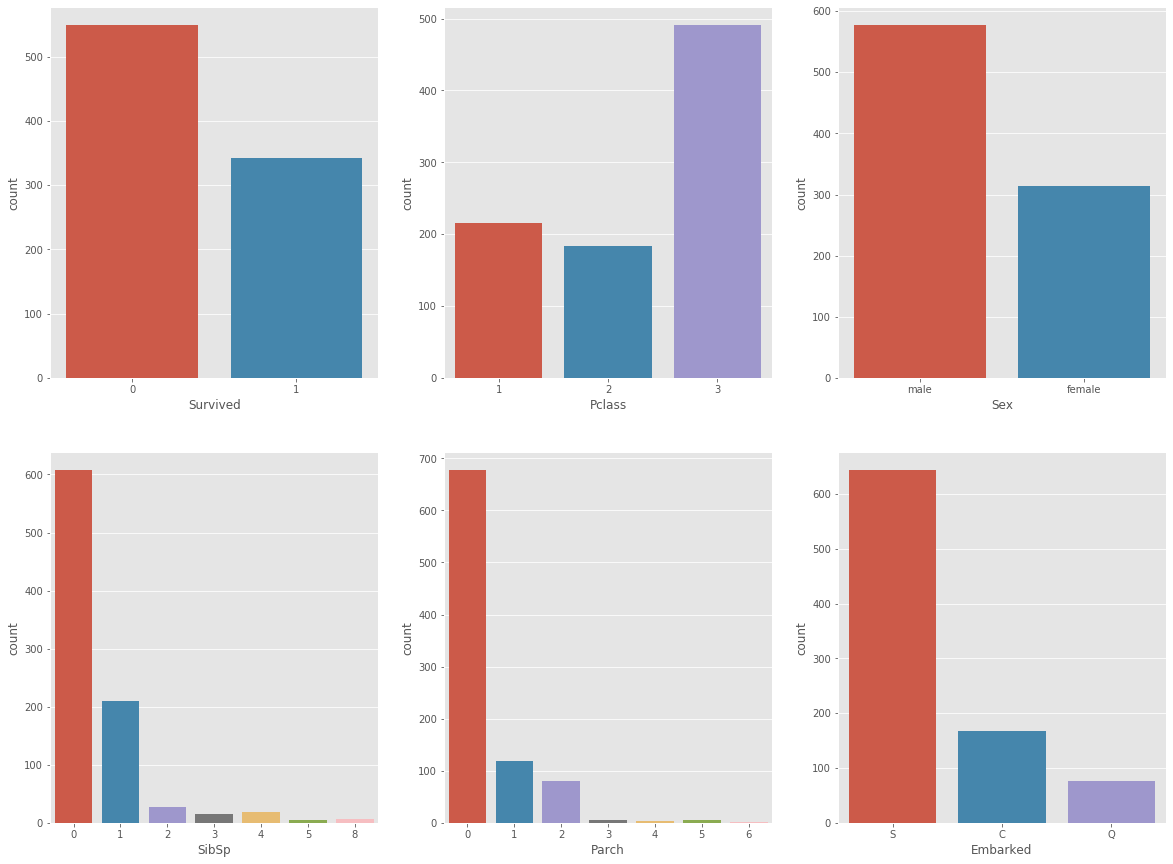

In [34]:
plotFrequency(cats)

In [37]:
def plotSurvival(cats):
    fig, ax = plt.subplots(2,3,figsize=(20,15))
    for i, cat in enumerate(cats,1):
        if cat == 'Survived':
            plt.subplot(2,3,i)
            sns.countplot(train[cat]) 
        else:
            plt.subplot(2,3,i)
            sns.countplot(x=cat, data=train, hue='Survived')          
            plt.legend(['No', 'Yes'], title = 'Survived', loc='upper center')

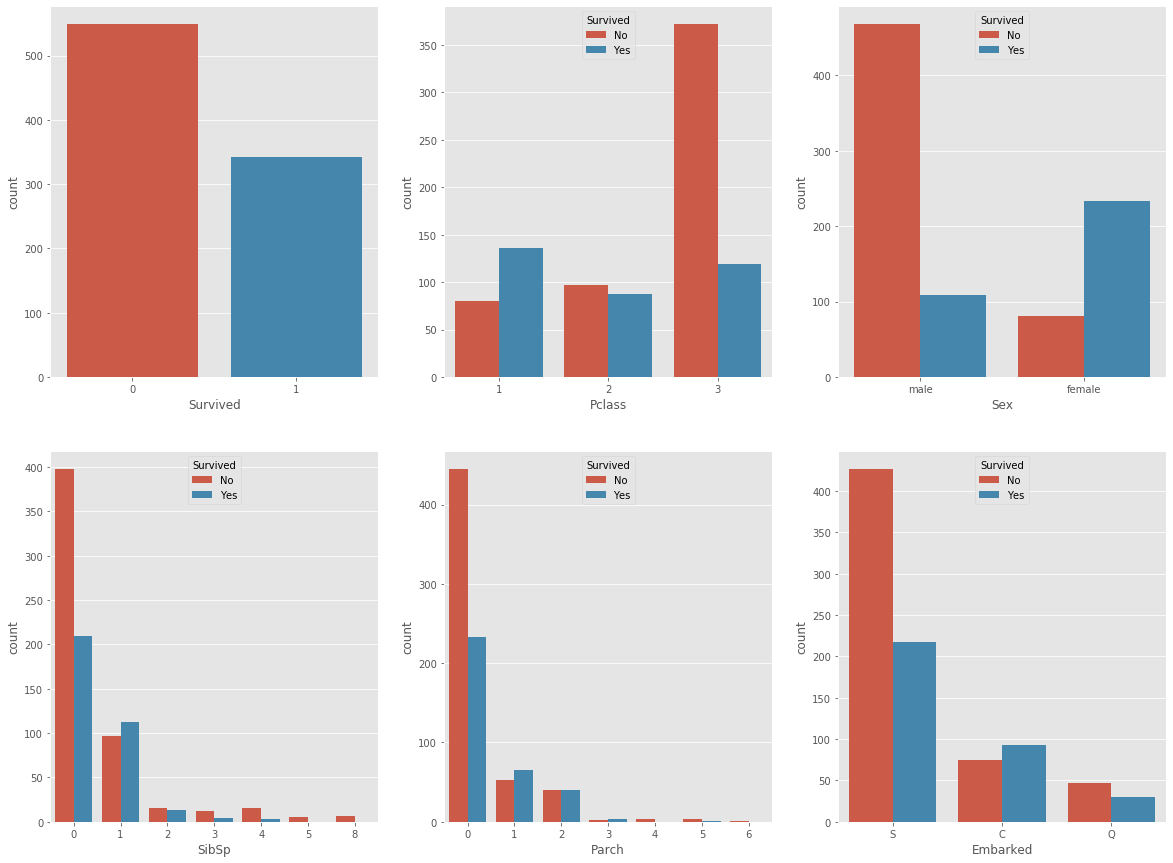

In [38]:
plotSurvival(cats)

Observations:

1. Sadly most of the train set passengers are not survived, around 62%.
2. While having highest portion of the passengers on the ship, 3rd class also having highest casuality ratio. Meanwhile first class have more survival rate. So this kind of confirms our hypothesis that mustering orders from captain (1>2>3) might have effect on survival.
3. Again most of the passengers on the ship are males(around two third of the passengers) they also have much higher ratio of casualities too. This confirms women part of the "Women and children first policy" had an effect in our Titanic case.
4. Most of our passengers are travelling alone, they also have high casuality rate. So being married or with family has some positive effect on survival?
5. Most of the passenger are embarked from Southampton. Survival rates differ between ports but I'm not sure if it's important observation or just random.

These are rough observations from inspecting some categorical data, let's continue with numerical ones...

# Numerical Features

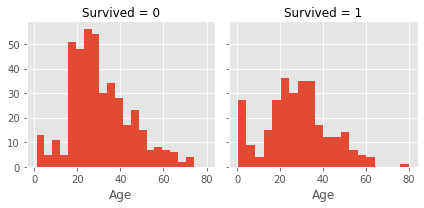

In [47]:
# Plotting survivor by Age
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

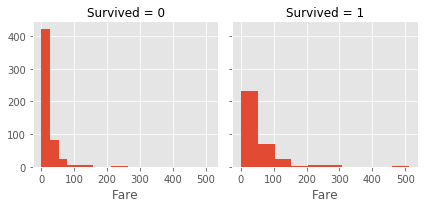

In [50]:
# Plotting survivor by Fare
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Fare')

In [41]:
def plot_3chart(df, feature):
    import matplotlib.gridspec as gridspec
    from matplotlib.ticker import MaxNLocator
    # Creating a customized chart. and giving in figsize
    fig = plt.figure(constrained_layout=True, figsize=(12, 8))
    grid = gridspec.GridSpec(nrows=3, ncols=3, figure=fig)
    
    # Plotting histogram grid
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(df.loc[:, feature].dropna()
                , hist=True
                , kde=True
                , fit=norm
                , ax=ax1)
    ax1.legend(labels=['Normal', 'Actual'])
    
    # Plotting the qq_plot
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('qq_plot')
    stats.probplot(df.loc[:, feature].dropna()
                  , plot=ax2)
    
    #Plotting the Boxplot
    ax3 = fig.add_subplot(grid[:, 2])
    ax3.set_title('Boxplot')
    sns.boxplot(df.loc[:, feature].dropna()
               , orient='v'
               , ax=ax3)
    ax3.yaxis.set_major_locator(MaxNLocator(nbins=24))
    
    

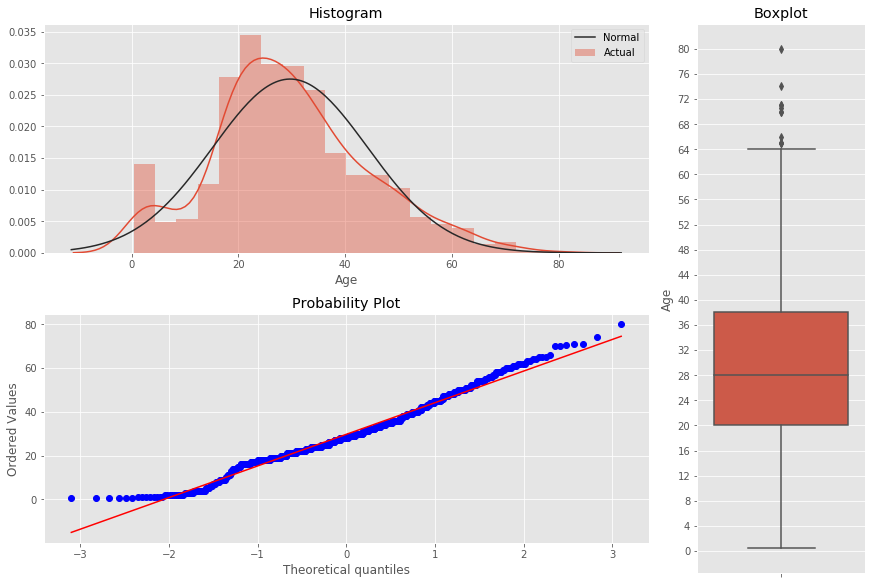

In [42]:
plot_3chart(train, 'Age')

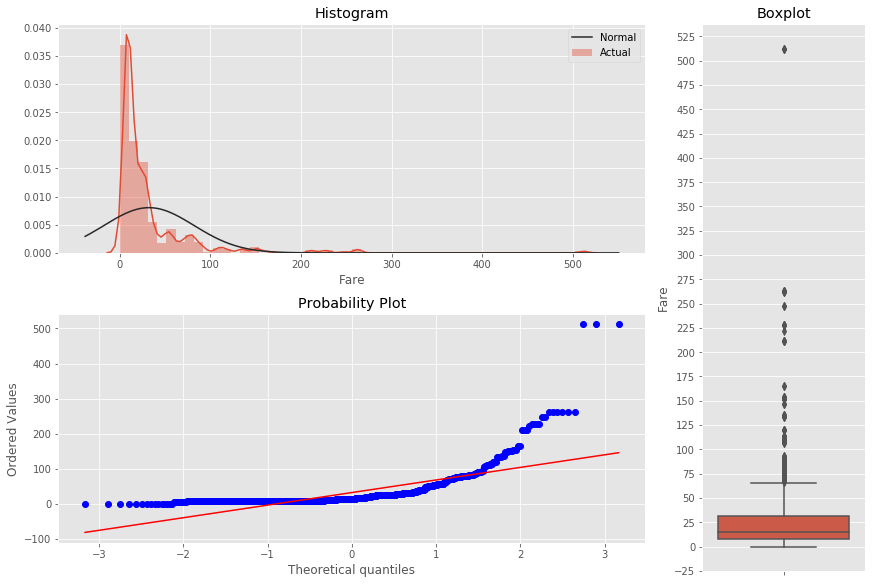

In [41]:
plot_3chart(train, 'Fare')

Let's group them 

In [3]:
# Group Age
train.loc[train['Age'] <= 18] = 0
train.loc[(train['Age'] > 18) & (train['Age'] <= 30), 'Age'] = 1
train.loc[(train['Age'] > 30) & (train['Age'] <= 45), 'Age'] = 2
train.loc[(train['Age'] > 45) & (train['Age'] <= 60), 'Age'] = 3
train.loc[ train['Age'] > 60, 'Age'] = 4
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,NaN,S


In [4]:
print(train.groupby('Age')['Age', 'Survived'].mean())

     Age  Survived
Age               
0.0  0.0  0.000000
1.0  1.0  0.355556
2.0  2.0  0.425743
3.0  3.0  0.407407
4.0  4.0  0.227273


In [5]:
# Group Fare
train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.64]",0.044843
1,"(7.64, 10.5]",0.217213
2,"(10.5, 26.55]",0.411483
3,"(26.55, 512.329]",0.572093
